In [1]:
### V1, 02.01.2017, Celine ###
####### Reads and visualizes ply meshes and computes their sulcal shades. #######
####### using functions open_ply, normal and normals from r03ert0 (Github) #######
####### and create_fig from juhuntenburg (Github) #######

In [2]:
%pylab inline

import numpy
import pylab
from plot_surf_stat_map_3 import create_fig
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Open mesh in ply format
def open_ply(filepath):
    f=open(filepath,'r');
    i=0;
    ip=0;
    it=0;
    np=0;
    nt=0;
    for str in f:
        i+=1;
        arr=str.split(" ");
        if(arr[0]=="element" and arr[1]=="vertex"):
            np=int(arr[2]);
            p=numpy.zeros((np,3));
        elif(arr[0]=="element" and arr[1]=="face"):
            nt=int(arr[2]);
            t=numpy.zeros((nt,3));
        elif(i>=11 and i<11+np):
            p[ip,0]=float(arr[0]);
            p[ip,1]=float(arr[1]);
            p[ip,2]=float(arr[2]);
            ip+=1;
        elif(i>=11+np and i<11+np+nt):
            t[it,0]=int(arr[1]);
            t[it,1]=int(arr[2]);
            t[it,2]=int(arr[3]);
            it+=1;
    mesh={};
    mesh["np"]=np;
    mesh["nt"]=nt;
    mesh["p"]=p;
    mesh["t"]=t;
    return mesh;

In [4]:
# Normal of triangle a,b,c
def normal(a,b,c):
    v=numpy.cross(b-a,c-a)
    n=v/numpy.linalg.norm(v)
    return n;

# Compute the normals for each vertex in mesh
def normals(mesh):
    np=mesh["np"];
    nt=mesh["nt"];
    p=mesh["p"];
    t=mesh["t"];
    n=numpy.zeros((np,3));
    for i in range(0,nt):
        nn=normal(p[t[i,0]],p[t[i,1]],p[t[i,2]]);
        n[t[i,0]]=numpy.add(n[t[i,0]],nn);
        n[t[i,1]]=numpy.add(n[t[i,1]],nn);
        n[t[i,2]]=numpy.add(n[t[i,2]],nn);
    for i in range(0,np):
        n[i]=n[i]/numpy.linalg.norm(n[i]);
    return n;

In [5]:
path = '/Users/ghfc/Desktop/'
fmesh = path+'P8_F10_mesh.ply'
mesh = open_ply(fmesh)

In [6]:
np=mesh["np"];
nt=mesh["nt"];
p=mesh["p"];
t=mesh["t"];

In [7]:
n = []
n = normals(mesh)

/Users/ghfc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ghfc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ghfc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ghfc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [9]:
# vector point of view for shades // ex: [1,0,0] light from the front of the brain 
vect = [1,0,0]
# if dot(a,b)=0 then a and b orthogonals
sulc = dot(n, vect)

In [27]:
data_ = ones(np)

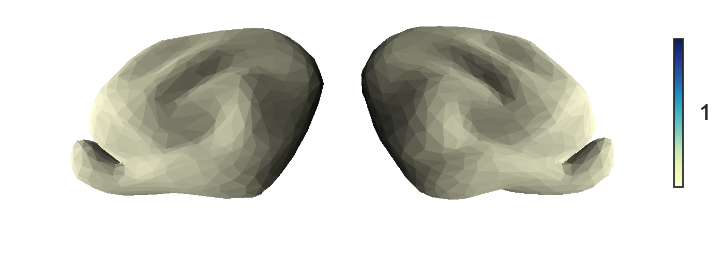

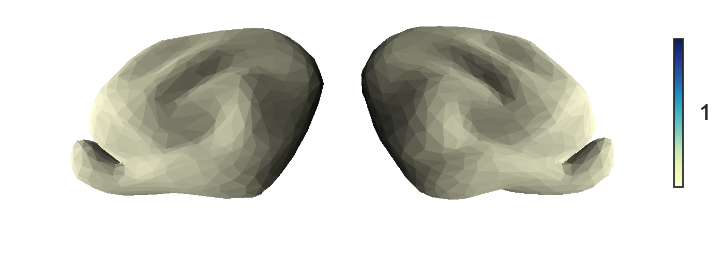

In [28]:
sns.set_context('poster')
sns.set_style("white")

create_fig( data=data_, coords=p, faces=t, azims=[0, 180], elevs=[0, 0], sulc=sulc, cmap='YlGnBu', cbar=True)
#plt.savefig(path+'P16_F21_sulc_fig.png')


In [ ]:
##### Endpoints projection and visualization of the surface #####
                    # Work in progress #

In [17]:
fendpoints = path+'P8_F10_endpoints.txt'
endpoints = loadtxt(fendpoints)

In [18]:
def findClosestPoint(ep, mesh):
    
    np=mesh["np"];
    nt=mesh["nt"];
    p=mesh["p"];
    t=mesh["t"];
    
    n = normals(mesh)
    
    d = 1000000
    
    for i in range(np-1):
            v = ep - p[i]
            d1 = absolute(dot(v, n[i]))
            
            if d1 < d:
                d = d1
                cp = p[i]
                point = i
    return point

In [24]:
ep = zeros(len(endpoints))

for x in range(len(endpoints)):

    ep[x] =findClosestPoint(endpoints[x],mesh)

/Users/ghfc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ghfc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ghfc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ghfc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [25]:
for i in ep:
    data_[i] = 100

/Users/ghfc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
